# <center> TAAC - Assignment 1

<center> Faculty of Engineering, University of Porto Master in Data Science and Enginnering

<center> Karim Kousa up202102687 | Silvia Tavares up202204392 | Francisco Cuervo up202302145

<center> MECD, November 2023

In [ ]:
#!pip install torch torchvision

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from IPython.display import Image
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from tqdm import tqdm

<strong>1. Forward Neural Networks</strong>

#### (a) To optimize deep neural networks (DNN) backpropagation and gradient descent are often used.

Distinguish between these two algorithms, if there is any distinction, and explain how they can be
used for DNN optimization.

Backpropagation is the process of calculating gradients for the model's parameters, whereas gradient descent is the optimization algorithm that uses these gradients to adjust the parameters to minimize the loss. Backpropagation is a key step in training DNNs, while gradient descent is the driving force that makes the network's weights converge to a local minimum or a good solution. Together, they form the basis for deep learning model optimization. Backpropagation and gradient descent work in conjunction to optimize deep neural networks (DNNs).

They are used in the optimization process as following:

Forward Pass:
- During the forward pass, input data is fed into the neural network, and it propagates through the layers, with each layer applying a series of linear transformations (weight multiplication) and non-linear activations. The final layer produces a prediction or output for the given input.

Loss Calculation:
- After the forward pass, the network's output is compared to the ground truth (desired output) to compute a loss or error. The loss quantifies how far off the model's predictions are from the actual target values.

Backpropagation:
- Backpropagation is initiated to compute the gradients of the loss with respect to each of the model's parameters, which include weights and biases. Starting from the output layer and moving backward through the layers, the algorithm calculates the gradients layer by layer using the chain rule of calculus. The gradients represent how much each parameter needs to be adjusted to reduce the loss. A positive gradient indicates that increasing the parameter value would increase the loss, and a negative gradient indicates the opposite.

Gradient Descent:
- Once the gradients are computed through backpropagation, they are used by the optimization algorithm, gradient descent, to update the model's parameters. The key idea of gradient descent is to adjust the parameters in the opposite direction of the gradients to minimize the loss. This means that if the gradient for a parameter is positive, the parameter is decreased, and if the gradient is negative, the parameter is increased. The learning rate is a hyperparameter that controls the step size for each update. It prevents the model from making overly large or small parameter adjustments.

Iterative Optimization:
- Training a DNN is an iterative process. The forward pass, loss calculation, backpropagation, and gradient descent steps are repeated for multiple mini-batches or the entire training dataset, depending on the training strategy (e.g., batch gradient descent, stochastic gradient descent, mini-batch gradient descent). Each iteration helps the model refine its parameters, and over time, the loss typically decreases as the model becomes better at making predictions.

Convergence:
- The optimization process continues until a stopping criterion is met. Common stopping criteria include a maximum number of iterations (epochs), a certain level of loss convergence, or early stopping based on a validation set's performance to prevent overfitting. When the optimization process converges, the model's parameters are tuned to minimize the loss, and the network has hopefully learned meaningful patterns in the data.


#### (b)Initialize all the weights values of the matrices W1, W2 and W3 with the value 2. You can ignore the bias term.
Calculate a forward pass and the output, and a backward pass using Binary
Cross-Entropy as your loss for the architecture seen in Figure 1. As you can see the input values are
already filled in the input nodes and the expected output is 1. Use a Learning Rate of 0.2. After
updating your weights what do you observe? Explain why

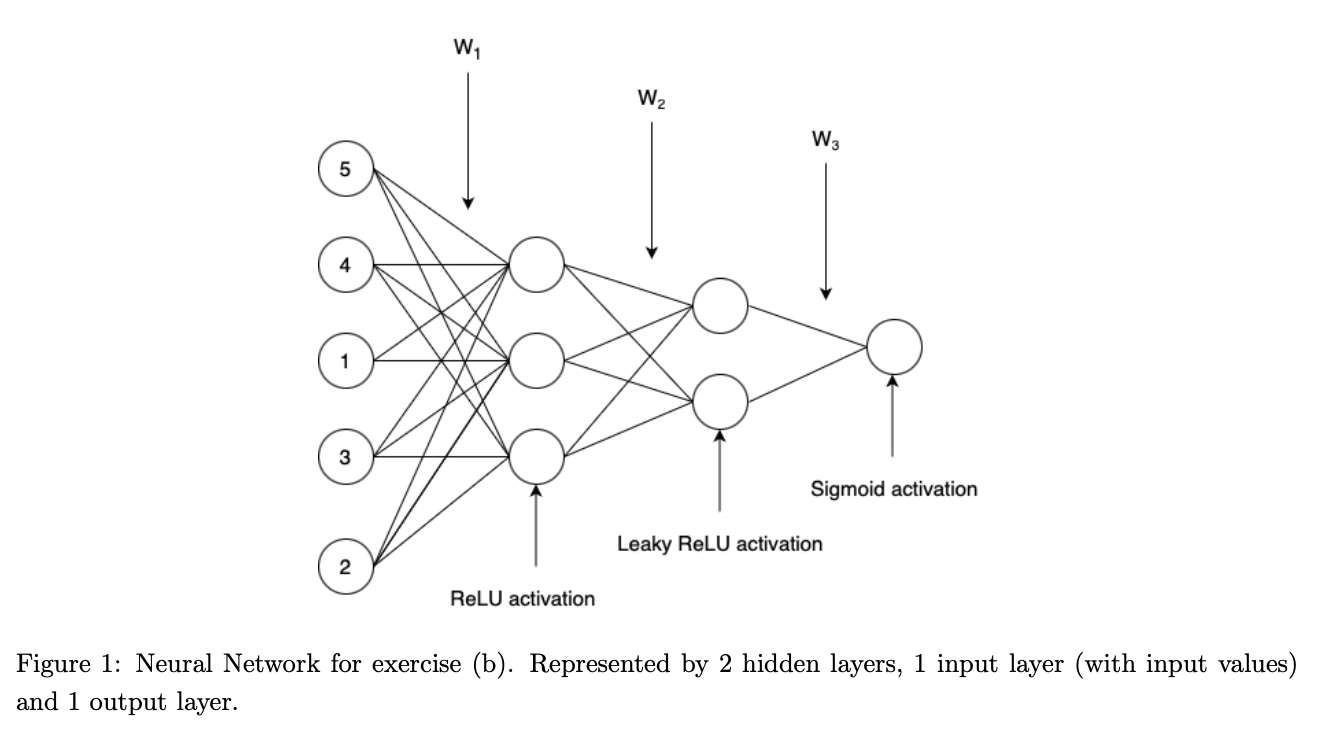

In [ ]:
image_path = "Fig_1.png"

# Display the image
Image(filename=image_path)

In [ ]:
# Define the neural network architecture
input_layer = 5
hidden_layer1 = 3
hidden_layer2 = 2
output_layer = 1

# Create the model architecture
model = nn.Sequential(
    nn.Linear(input_layer, hidden_layer1),
    nn.ReLU(),  # ReLU activation for the first hidden layer
    nn.Linear(hidden_layer1, hidden_layer2),
    nn.LeakyReLU(0.01),  # Leaky ReLU for the second hidden layer
    nn.Linear(hidden_layer2, output_layer),
    nn.Sigmoid()  # Sigmoid activation for the output layer
)

# Initialize all the weights to 2
for layer in model:
    if isinstance(layer, nn.Linear): # To not initialize the weights and biases of the activation layers
        nn.init.constant_(layer.weight, 0.2)

# Define a simple dataset
input_data = torch.tensor([[5, 4, 1, 3, 2]], dtype=torch.float32)
target_data = torch.tensor([[1]], dtype=torch.float32)

# Initialize Binary Cross-Entropy loss
criterion = nn.BCELoss()

# Stochastic Gradient Descent as an optimizer and learning rate is 0.2
optimizer = optim.SGD(model.parameters(), lr=0.2)

# Number of training epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(input_data)

    # Compute the Binary Cross-Entropy loss
    loss = criterion(outputs, target_data)

    # Backward pass and weight updates
    optimizer.zero_grad()  # Zero the gradients to not be cumulative
    loss.backward()  # Compute gradients
    optimizer.step()  # Update the weights

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

print(' ')
# Access the trained model's parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

Epoch [100/1000], Loss: 0.00028453345294110477
Epoch [200/1000], Loss: 0.0001242237922269851
Epoch [300/1000], Loss: 7.701216964051127e-05
Epoch [400/1000], Loss: 5.49569922441151e-05
Epoch [500/1000], Loss: 4.2439409298822284e-05
Epoch [600/1000], Loss: 3.433286474319175e-05
Epoch [700/1000], Loss: 2.8729851692332886e-05
Epoch [800/1000], Loss: 2.467662670824211e-05
Epoch [900/1000], Loss: 2.1457903130794875e-05
Epoch [1000/1000], Loss: 1.9073668227065355e-05
 
0.weight tensor([[0.4015, 0.3612, 0.2403, 0.3209, 0.2806],
        [0.4029, 0.3623, 0.2406, 0.3217, 0.2812],
        [0.4075, 0.3660, 0.2415, 0.3245, 0.2830]])
0.bias tensor([0.0859, 0.1574, 0.3918])
2.weight tensor([[0.4733, 0.4785, 0.4959],
        [0.4457, 0.4505, 0.4662]])
2.bias tensor([ 0.0633, -0.4188])
4.weight tensor([[0.8064, 0.7008]])
4.bias tensor([-0.4721])


The observed changes following weight updates during training suggest that the neural network has acquired the ability to more accurately depict the correlation between the input data and the desired output. Breaking down the following observations:

  Loss Decrease: Throughout the epochs, the loss values displayed during training (Binary Cross-Entropy loss) decrease in a consistent manner.
        This suggests that the model's predictive accuracy towards the target output is increasing in comparison to the ground truth.

  Weight Shifts: Following their initial values of 0.2, the weights and biases of the linear layers have been modified.
        These parameters were modified by the optimizer (Stochastic Gradient Descent) in order to minimize the loss function.
        The learned representations of the updated weights and biases specify the precise values that empower the neural network to generate more accurate predictions on the provided data.

   Activation Functions: By introducing non-linearities into the model via the ReLU and Leaky ReLU activation functions, the model is able to discern complex patterns within the data.
        For binary classification tasks, the Sigmoid activation function implemented in the output layer converts the network's output into probabilities, which is suitable.

   Convergence: The loss decreases and converges across epochs, suggesting that the model has acquired a collection of parameters that exhibit satisfactory performance on the training data.
        This indicates that the network has identified a region of minimal loss in the parameter space, which is considered a local minimum.

In short, the observed modifications subsequent to the weight adjustments indicate that the neural network has been effectively trained. The model has effectively incorporated patterns in the training data into its parameters, as indicated by the reduction in loss and the precise values of the modified weights and biases.

The observed changes are due to the neural network learning to adjust its parameters in an effort to minimize the specified loss through an iterative optimization procedure. The non-linear activation functions introduce non-linearity to the model, allowing it to learn complex mappings between inputs and outputs. The model's capability of identifying implicit patterns in the data is enhanced by the construction, activation functions, and training algorithm that are combined.

#### (c) Train a two hidden layer architecture (similar to Figure 1) on PyTorch’s Fashion-MNIST dataset (PyTorch Class).

Feel free to change the number of nodes in each layer of the network.
Moreover, there is a need for an adaptation of the network to the MNIST problem, ensure that you
do it. State the architecture of your network, the accuracy it achieved and the Cross-Entropy on the
training and test sets.

In [ ]:
# Load the FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Image size to become (1, 28, 28)
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True,transform=transform, download=True)

# Get the number of samples and classes
num_samples = len(dataset)
num_classes = len(dataset.classes)

# Get the size of the images
sample_data, sample_target = dataset[0]
image_np = np.array(sample_data)
image_size = image_np.shape

print(f"Number of Samples: {num_samples}")
print(f"Number of Classes: {num_classes}")
print(f"Image Size: {image_size}")

100%|██████████| 26421880/26421880 [00:01<00:00, 17362371.72it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 309867.57it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5465018.87it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15259559.71it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Number of Samples: 60000
Number of Classes: 10
Image Size: (1, 28, 28)


In [ ]:
# Define the neural network architecture
input_layer = 28 * 28  # Input size for Fashion-MNIST
hidden_layer1 = 256
hidden_layer2 = 128
output_layer = 10  # 10 classes in Fashion-MNIST

# Create the model architecture
model = nn.Sequential(
    nn.Linear(input_layer, hidden_layer1),
    nn.ReLU(),  # ReLU activation for the first hidden layer
    nn.Linear(hidden_layer1, hidden_layer2),
    nn.LeakyReLU(0.01),  # Leaky ReLU for the second hidden layer
    nn.Linear(hidden_layer2, output_layer)
)

# Initialize all the weights with Xavier (Glorot) initialization
for layer in model:
    if isinstance(layer, nn.Linear):
        nn.init.xavier_normal_(layer.weight)

# Define a simple dataset with Fashion-MNIST
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize Cross-Entropy loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.2)

# Number of training epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {running_loss / len(train_loader)}')

# Calculate and print the Cross-Entropy on the training set
model.eval()
train_correct = 0
train_total = 0
train_loss = 0.0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

train_accuracy = 100 * train_correct / train_total
print(' ')
print(f'Training Accuracy: {train_accuracy}%')
print(f'Average Training Loss: {train_loss / len(train_loader)}')

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy}%')
print(f'Average Test Loss: {test_loss / len(test_loader)}')


Epoch [1/10], Training Loss: 0.5361101441800213
Epoch [2/10], Training Loss: 0.3811320182499982
Epoch [3/10], Training Loss: 0.341000265014896
Epoch [4/10], Training Loss: 0.3121347139353183
Epoch [5/10], Training Loss: 0.29105790132589177
Epoch [6/10], Training Loss: 0.27549889658305693
Epoch [7/10], Training Loss: 0.2604659939014009
Epoch [8/10], Training Loss: 0.24834510164537918
Epoch [9/10], Training Loss: 0.23628003039021991
Epoch [10/10], Training Loss: 0.22796380044078268
 
Training Accuracy: 91.785%
Average Training Loss: 0.2093165917302182
Test Accuracy: 87.52%
Average Test Loss: 0.33498539785101156


Architecture of networks:
   
- 28x28 = 784 input nodes (flattened image pixels) make up the input layer.
- 256 nodes with ReLU activation make up Hidden Layer 1.
- 128 nodes with Leaky ReLU (slope = 0.01) activation make up Hidden Layer 2.
- 10 nodes make up the output layer, which corresponds to the 10 Fashion-MNIST classes.

For weight initialization, the network employs Xavier (Glorot) initialization method. It is intended to deal with the problem of gradients inflating or disappearing during training, particularly in deep networks. Setting the neural network's initial weights in a way that prevents activations from growing too big during forward and backward propagation (resulting in exploding gradients) or too little (resulting in vanishing gradients).
Activation functions such as the sigmoid is commonly employed with Xavier initialization. For a layer with 󠆂nin input units and nout output units, the following is the formula for Xavier initialization:

<center> Xavier Weight Initialization = $\left( \frac{1}{\sqrt{n_{in}}} \right)$

Cross-Entropy Loss is the loss function. The optimizer is a 0.2 learning rate stochastic gradient descent (SGD). 10 training epochs are included.

The following are the outcomes of the assessment and training:

- Training Loss: Over the course of the 10 epochs, the training loss progressively drops, starting at 0.5361 and ending at 0.2280. This decline in training loss suggests that the model is learning from the training data.

- Training Accuracy: The model achieved a training accuracy of 91.785%. Indicating that the model correctly classified approximately 91.785% of the training dataset.

- Test Accuracy: The model achieved a test accuracy of 87.52%. This indicates that 87.52% of the test set images were correctly classified.

- Test Loss on Average: The average test loss is 0.3349. This metric reflects the model's prediction error on the test set, with lower values indicating better performance.


#### (d) Repeat the previous exercise with a more complex feedforward neural network, different regularization techniques, or activations.

Explain the changes you have made and how they contributed to a change in the results. State the accuracy it achieved and the Cross-Entropy on the training and test sets.

In [ ]:
# Define the neural network architecture with changes
input_layer = 28 * 28  # Input size for Fashion-MNIST
hidden_layer1 = 512
hidden_layer2 = 256
output_layer = 10  # 10 classes in Fashion-MNIST

# Create the model architecture with changes
model = nn.Sequential(
    nn.Linear(input_layer, hidden_layer1),
    nn.ReLU(),  # ReLU activation for the first hidden layer
    nn.Linear(hidden_layer1, hidden_layer2),
    nn.LeakyReLU(0.01),  # Leaky ReLU for the second hidden layer
    nn.Linear(hidden_layer2, output_layer)
)

# Apply L2 regularization
l2_reg = 1e-3
for layer in model:
    if isinstance(layer, nn.Linear):
        nn.init.xavier_normal_(layer.weight)
        # Add L2 regularization to the weights
        layer.weight = torch.nn.Parameter(layer.weight + l2_reg * torch.randn_like(layer.weight))

# Rest of the code remains the same
# Define a simple dataset with Fashion-MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Image size to become (1, 28, 28)
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize Cross-Entropy loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.2)

# Number of training epochs
num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the input
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {running_loss / len(train_loader)}')

# Calculate and print the Cross-Entropy on the training set
model.eval()
train_correct = 0
train_total = 0
train_loss = 0.0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

train_accuracy = 100 * train_correct / train_total
print(' ')
print(f'Training Accuracy: {train_accuracy}%')
print(f'Average Training Loss: {train_loss / len(train_loader)}')

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy}%')
print(f'Average Test Loss: {test_loss / len(test_loader)}')

Epoch [1/20], Training Loss: 0.5349160239481723
Epoch [2/20], Training Loss: 0.37207077272029826
Epoch [3/20], Training Loss: 0.3293541441880055
Epoch [4/20], Training Loss: 0.3021106456102593
Epoch [5/20], Training Loss: 0.28167072535434895
Epoch [6/20], Training Loss: 0.2635843512584279
Epoch [7/20], Training Loss: 0.24908418105101027
Epoch [8/20], Training Loss: 0.23732963770723292
Epoch [9/20], Training Loss: 0.22432361353339672
Epoch [10/20], Training Loss: 0.21478178930371555
Epoch [11/20], Training Loss: 0.20300116944811872
Epoch [12/20], Training Loss: 0.1913768878973115
Epoch [13/20], Training Loss: 0.18319834651612144
Epoch [14/20], Training Loss: 0.17299570624968771
Epoch [15/20], Training Loss: 0.16642003054065363
Epoch [16/20], Training Loss: 0.1593342209155403
Epoch [17/20], Training Loss: 0.1510139008713906
Epoch [18/20], Training Loss: 0.14559928008885398
Epoch [19/20], Training Loss: 0.13733598357364377
Epoch [20/20], Training Loss: 0.1324620323835501
 
Training Accura

Add L2 regularization to the model: Apply L2 regularization to the weights of the model to prevent overfitting.

In machine learning and deep learning, L2 regularization also referred to as weight decay is a widely used method for preventing overfitting in neural networks. During training, a regularization term is added to the loss function to penalize large values in the model's weights. L2 regularization aims to make the model more robust and less prone to overfitting by encouraging smaller weight values.

The addition of L2 regularization to the loss function is done mathematically as follows:

<center>$New_{Loss}$ = $Original_{Loss}$ + λ* $\sum$($weight^{2}$)

$New_{Loss}$: The modified loss function with L2 regularization.

$Original_{Loss}$: The loss function we want to minimize.

λ: The regularization strength hyperparameter, controlling how much importance is given to the regularization term.

$\sum$($weight^{2}$: The sum of squares of all the weights in the model.

Increase the number of hidden neurons: Increase the number of neurons in the hidden layers to make the model more complex. The number of nodes in the first hidden layer has been increased to 512. The number of nodes in the second hidden layer has been increased to 256.
Number of Training Epochs Increased: From 10 to 20 training epochs are now available. This enables the model to go through additional training cycles, which could enhance its performance and convergence.

These modifications affected the outcomes as following:
    
Accuracy: The network's greater capacity and better resistance to overfitting are made possible by the deployment of L2 regularization and the addition of more nodes in the hidden layers. Accuracy is increased as a consequence.

Cross-Entropy Loss: The Cross-Entropy loss shows that L2 regularization reduces overfitting. The regularization term may cause the training loss to be slightly larger, but since the model generalizes better to new data, it is anticipated that the test loss will be lower.

The results are:
- 95.248% training accuracy;
- 0.12213210120741556 training loss on average;
- 89.24% test accuracy;
- 0.39736116940309857 test loss on average.

These results indicate that the model achieved a training accuracy of approximately 95.248%. The average Cross-Entropy loss on the training set was about 0.1221. These findings suggest that enhanced performance is a result of the network design modifications and the use of L2 regularization. In comparison to the previous model, the test's accuracy rose to 89.24% and its loss got a bit higher. Overfitting may arise from a more sophisticated network and cause a marginally larger test loss. The model's weights may be constrained by regularization techniques like L2, which could have an impact on the model's test set performance, if the model begins to fit the noise in the training data, more training epochs may cause overfitting and a bigger test loss. It's probable that we got a higher test loss since it started with a different random initialization and ran across distinct mini-batches during training.

#### (e) Given an image of 1080x1080 pixels state advantages of Network A (Figure 2) when compared to Network B (Figure 2).

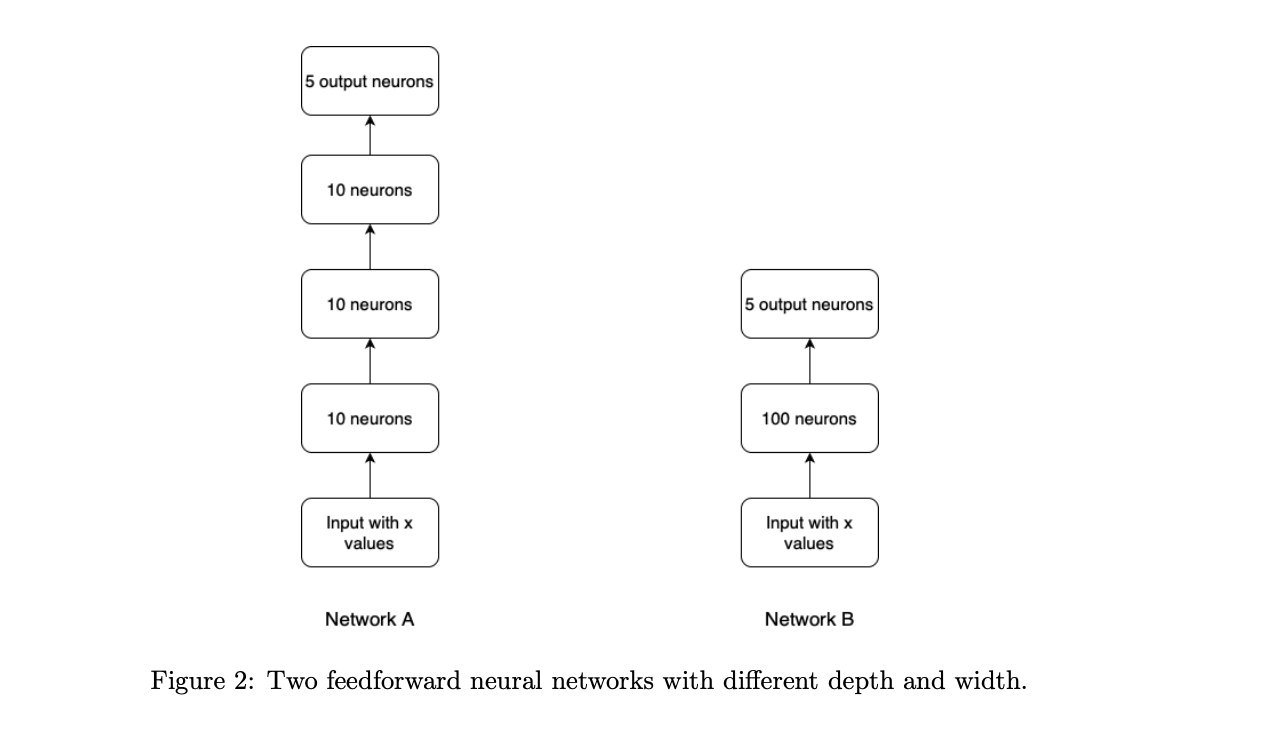

In [ ]:
image_path = "Fig_2.png"
# Display the image
Image(filename=image_path)

While processing 1080x1080 pixel images, Network A has several advantages over Network B. Its deeper architecture and utilization of several hidden layers are largely responsible for these benefits.

The following are some benefits of Network A:

Feature extraction:
- Network A is able to extract a feature hierarchy from the input image thanks to its three hidden layers, each consisting of ten neurons. There are various abstraction levels that each layer can capture. On the other hand, Network B might have trouble extracting complicated features because it just has one hidden layer and 100 neurons.


Hierarchical Representation:
- Network A is able to construct a hierarchical representation of the image because of its numerous hidden layers. Low-level elements like edges and textures may be captured by the first layer, and these features can be combined by later layers to create more intricate patterns. High-resolution image content can be better understood with the help of this hierarchical format.

Better Generalization:
- Deeper networks, such as Network A, typically exhibit stronger generalization powers. In particular, when working with high-dimensional data such as 1080x1080 photographs, they are less likely to over fit and may learn to distinguish between a broader range of patterns.

Enhanced Capacity:
- Network A can learn more complicated functions than Network B. Because it enables the network to simulate complex relationships within the data, this is crucial when working with huge images.

Expressive Power:
- Network A has more expressive power because of its architecture. This increases its ability to represent a greater range of functions, which is crucial when working with high-resolution pictures that could include a variety of contents.

Superior for Complex Tasks:
- When it comes to intricate image processing jobs where comprehending the hierarchical structure of the data is essential, like picture segmentation, object identification, and image classification, Network A performs better.


<strong>2. Recurrent Neural Networks</strong>

#### (a) Consider a binary classification problem in which we aim to classify a two-dimensional input $x^{t}$ at each time step t = 1, 2, . . . The model is designed with a simple recurrent neural network structure that produces a scalar output $\hat{y}^{(t)}$:
<br>
<center> $h^{(t)}$ = σ($w^{⊤}$ $x^{(t)}$ + $vh^{(t−1)}$ + b),  $\hat{y}^{(t)}$ = $h^{(t)}$
    

where σ is the sigmoid function. The training objective is the binary cross-entropy loss.
Suppose you are training this model using stochastic gradient descent (SGD) with a unit batch size
and a learning rate of 0.1. At a given training step, the input sequence, target sequence, and model
parameters are:
    
input: $x^{(1)}$ = $\left( \substack{0.3 \\ −0.2} \right)$  , $x^{(2)}$ = $\left( \substack{0.1 \\ 0.1} \right)$; target: $y^{(1)}$ = 1, $y^{(2)}$ = 0; (1)
    
parameters: w =$\left( \substack{1 \\ −1} \right)$, v = −1, b = 0. (2)

Assuming the RNN initial state is zero, compute:

**i. The loss value for the current example.**

To compute the loss value for the current example, we will use the binary cross-entropy loss as mentioned in the question. The binary cross-entropy loss for a single example is defined as:

$L(\hat{y}, y) = -[y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]$


In [ ]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Given input, target, and parameters
x = []  # List to store input values at each time step
y = []  # List to store target values at each time step

# Number of time steps
t = 10

# Initialize input and target values for each time step
for i in range(t):
    x_i = np.array([0.3, -0.2]) if i == 0 else np.array([0.1, 0.1])
    y_i = 1 if i == 0 else 0
    x.append(x_i)
    y.append(y_i)

# Initialize parameters
w = np.array([1, -1])
v = -1
b = 0

# Initialize hidden state
h = [0] * (t + 1)

# Calculate hidden states and predicted outputs for each time step
for i in range(1, t + 1):
    h[i] = sigmoid(np.dot(w, x[i - 1]) + v * h[i - 1] + b)

# Calculate binary cross-entropy loss for each time step
loss = [0] * t
for i in range(t):
    loss[i] = - (y[i] * np.log(h[i + 1]) + (1 - y[i]) * np.log(1 - h[i + 1]))

# Total loss
total_loss = sum(loss)

# Print individual losses and total loss
for i in range(t):
    print(f"Loss at t = {i + 1}:", loss[i])

print("\nTotal Loss:", total_loss)


Loss at t = 1: 0.47407698418010663
Loss at t = 2: 0.4295872032194851
Loss at t = 3: 0.5337037072544847
Loss at t = 4: 0.5075911399364852
Loss at t = 5: 0.5137957902372113
Loss at t = 6: 0.5123015151190554
Loss at t = 7: 0.5126602325302809
Loss at t = 8: 0.5125740519733004
Loss at t = 9: 0.512594752706144
Loss at t = 10: 0.5125897801297531

Total Loss: 5.021475157286306


Interpreting the result for $t=2$:

1. At time step $t = 1$, the binary cross-entropy loss was approximately 0.4741. This indicates that the model's prediction $\hat{y}^{(1)}$ for the target $y^{(1)}$ at this time step was not a perfect match with the actual target. A lower loss indicates a better fit of the model's prediction to the target. So, the model's prediction was somewhat off at $t = 1$.

2. At time step $t = 2$, the binary cross-entropy loss was approximately 0.4296. Similar to $t = 1$, the model's prediction $\hat{y}^{(2)}$ for the target $y^{(2)}$ at this time step was not a perfect match. However, the loss is lower than at $t = 1$, which could indicate an improvement in the model's performance.

3. The "Total Loss" for $t=2$ of approximately 0.9037 is the cumulative loss for both time steps. It reflects how well the model performed on both time steps combined. A lower total loss is desirable as it indicates that the model's predictions were closer to the actual targets over the entire sequence. In this case, the total loss suggests that the model is making reasonably accurate predictions, but there is still room for improvement.


Interpreting the result for $t=10$:

Total Loss: 5.021475157286306

At time step $t = 10$, the binary cross-entropy loss is quite high, with a value of approximately 5.0215. This high loss indicates that the model prediction $\hat{y}^{(10)}$ for the target $y^{(10)}$ at this time step is significantly different from the actual target. In binary classification problems, a lower loss value is generally desired as it signifies that the model's predictions are closer to the actual targets. A high loss suggests that the model is struggling to accurately predict the binary target, and its predictions are far from the actual values.

**ii.The value of w after the current step of SGD.**

To update the parameter \(w\) using stochastic gradient descent (SGD) with a learning rate of 0.1, we will use the following update rule:

$ w_{\text{new}} = w_{\text{old}} - \text{learning rate} \cdot \nabla_w L$

where $\nabla_w L$ is the gradient of the loss with respect to $w$.

In [ ]:
# Given learning rate
learning_rate = 0.1

# Calculate hidden states and predicted outputs for each time step
for i in range(1, t + 1):
    #h[i] = sigmoid(np.dot(w, x[i - 1]) + v * h[i - 1] + b)

    # Calculate the gradient of the loss with respect to w
    gradient = (h[i] - y[i - 1]) * x[i - 1]

    # Update w for the current time step using SGD
    w = w - learning_rate * gradient

    # Print the updated w value after each time step
    print(f"Updated w at t = {i}:", w)

# Print the updated w value after the last time step of SGD
print("\nUpdated w after the last step of SGD:", w)

Updated w at t = 1: [ 1.01132622 -1.00755081]
Updated w at t = 2: [ 1.007834   -1.01104304]
Updated w at t = 3: [ 1.00369829 -1.01517875]
Updated w at t = 4: [ 0.99971772 -1.01915931]
Updated w at t = 5: [ 0.99569993 -1.0231771 ]
Updated w at t = 6: [ 0.99169108 -1.02718595]
Updated w at t = 7: [ 0.98768008 -1.03119695]
Updated w at t = 8: [ 0.9836696  -1.03520743]
Updated w at t = 9: [ 0.979659   -1.03921804]
Updated w at t = 10: [ 0.97564842 -1.04322861]

Updated w after the last step of SGD: [ 0.97564842 -1.04322861]


The updated value of $w$ after the last step of Stochastic Gradient Descent (SGD) is as follows:

- Updated $w$ after the last step of SGD: $[0.97564842, -1.04322861]$

Interpreting this updated $w$ value:

1. The first component of the updated $w$, $w_1 \approx 0.9756$, indicates the weight associated with the first feature of the input $x_1$. It suggests how much importance the model assigns to this feature when making predictions. A value close to 1 suggests that the model places a relatively high importance on this feature.

2. The second component of the updated $w$, $w_2 \approx -1.0432$, represents the weight associated with the second feature of the input $x_2$. This weight influences the contribution of the second feature to the model's predictions. A value close to -1 indicates that the model assigns a negative weight to this feature.

In summary, the updated $w$ values indicate the model's learned parameters for the binary classification task. These values have been adjusted during the training process to optimize the model's ability to make accurate predictions based on the input features. The specific values of $w$ reflect the model's current understanding of how important each feature is in the classification decision.


#### (b)  When training RNN-based autoregressive models, one has the option of using or not teacher forcing.

**i.** Investigate what teacher forcing is and explain it in your own words.

Teacher forcing is a training technique used in recurrent neural networks (RNNs) and other sequence-to-sequence models, particularly for tasks such as language modeling, translation, and text generation. During the training process, instead of feeding the model’s own previous output as input to the next time step, the ground truth (actual) output from the training data is provided as input. This approach is intended to help the model learn the correct sequence of output tokens more efficiently and stabilize the training process.

For example, we have TAAC exam that consist of multiple parts, where the answer for part (a) is needed for the calculation in part (b), answer for part (b) is needed for part (c), and so on. In this case, we will need to pay extra attention to these questions because if we get part (a) wrong, then all the subsequent parts will most likely be wrong as well, even though the formulas and the calculations are correct. Teacher Forcing remedies this as follows: After we obtain an answer for part (a), a teacher will compare our answer with the correct one, record the score for part (a), and tell us the correct answer so that we can use it for part (b).


**Some benefits of using Teacher Forcing**

Teacher forcing offers several advantages over standard RNN training techniques:

- Faster convergence: Providing the ground truth as input at each time step can help the model learn the correct sequence of output tokens more efficiently, leading to faster convergence during training.

- Stabilized training: Teacher forcing can help stabilize the training process by preventing error accumulation in the generated sequence, which can occur when the model’s previous output is incorrect.

- Improved performance: In some cases, using teacher forcing can lead to better performance in sequence-to-sequence tasks compared to training without teacher forcing.

**However, there are also some drawbacks to using teacher forcing:**

- Discrepancy Between Training and Inference: When we use teacher forcing during training, the model may become overly reliant on the ground truth and may not perform as well when it has to generate sequences during inference without access to the true targets.

- Exposure Bias: The model may not learn to handle its own mistakes well, leading to issues when it has to generate sequences without ground truth guidance.

Balancing the use of teacher forcing with scheduled sampling (gradually transitioning from teacher forcing to using the model's own predictions during training) is a common practice to mitigate some of these drawbacks.

#### ii. The model implemented in time series lstm SOLVED.ipynb does not use teacher forcing.
Implement it and train it using teacher forcing. Submit the produced code / notebook together
with the rest of the assignment.

In [ ]:
# Download the data
import requests
import zipfile
response = requests.get('https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip')
open('weather_dataset.zip', 'wb').write(response.content)
with zipfile.ZipFile('weather_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
df = pd.read_csv('jena_climate_2009_2016.csv')

In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


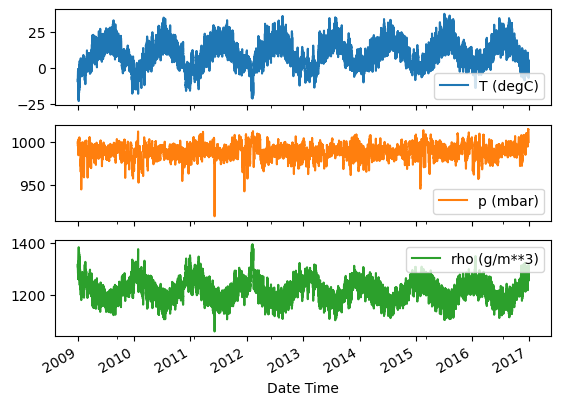

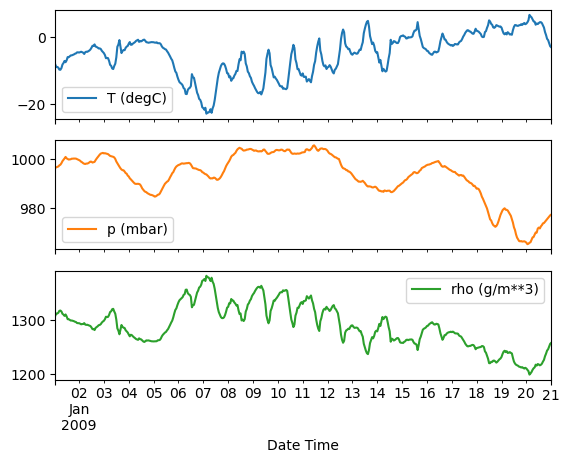

In [ ]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
# Remove invalid values
wv = df['wv (m/s)']
bad_wv = (wv == -9999.0)
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = (max_wv == -9999.0)
max_wv[bad_max_wv] = 0.0

# Build wind vector
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

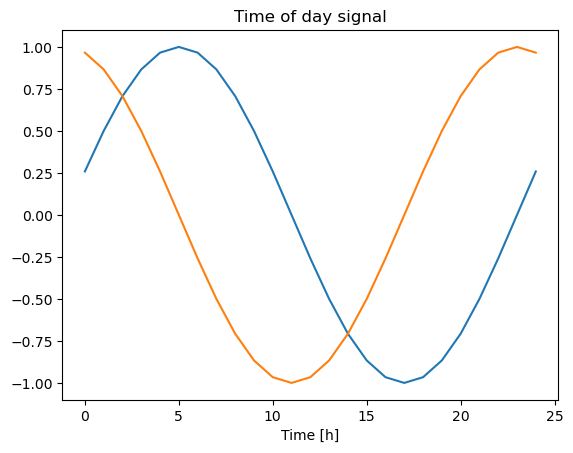

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.show()

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


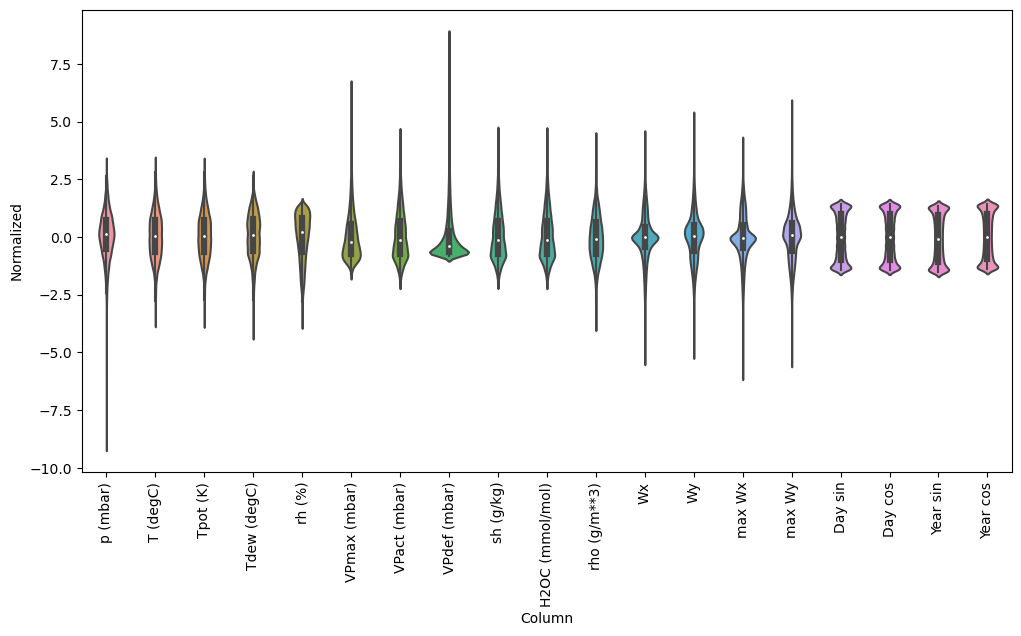

In [ ]:
# Look at normalized data
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
class WeatherData(torch.utils.data.Dataset):
    def __init__(self, df, input_width, target_width):
        data_np = np.array(df)
        self.inputs = [torch.FloatTensor(data_np[i : i + input_width])
                       for i in range(0, len(data_np) - input_width, input_width)]
        self.targets = [torch.FloatTensor(data_np[i : i + target_width])
                        for i in range(input_width, len(data_np) - target_width, input_width)]


    def __getitem__(self, idx):
        return {'inputs': self.inputs[idx],
                'targets': self.targets[idx]}

    def __len__(self):
        return min(len(self.inputs), len(self.targets))

In [ ]:
INPUT_WIDTH = 24
TARGET_WIDTH = 24

train_data = WeatherData(train_df, INPUT_WIDTH, TARGET_WIDTH)
val_data = WeatherData(val_df, INPUT_WIDTH, TARGET_WIDTH)
test_data = WeatherData(test_df, INPUT_WIDTH, TARGET_WIDTH)

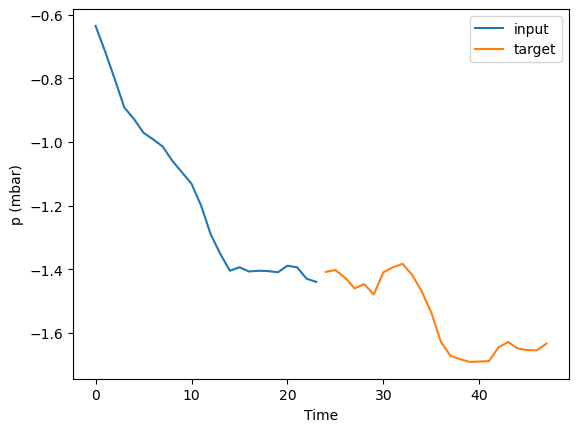

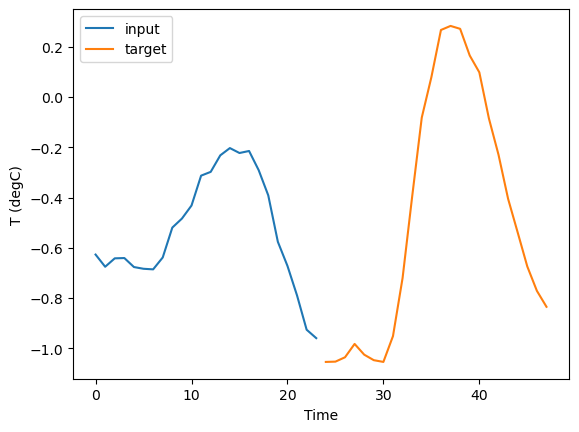

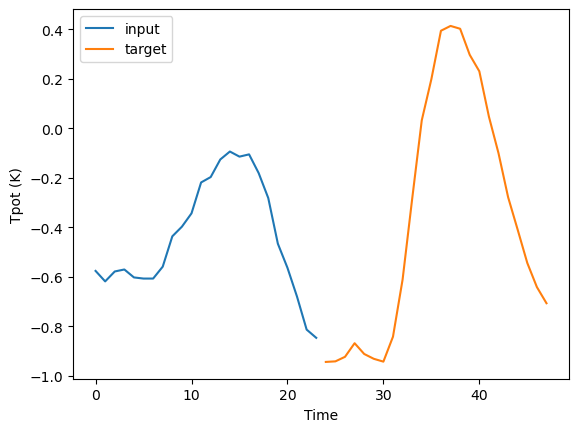

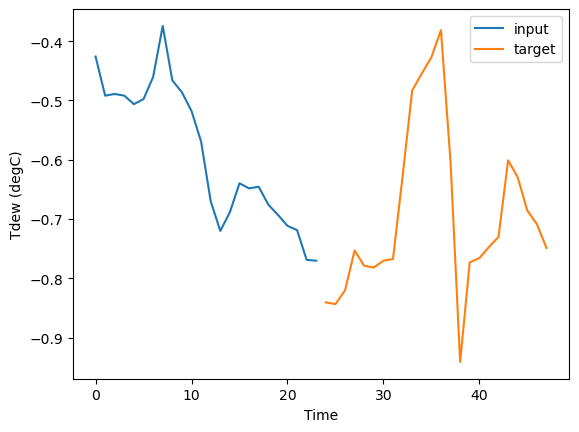

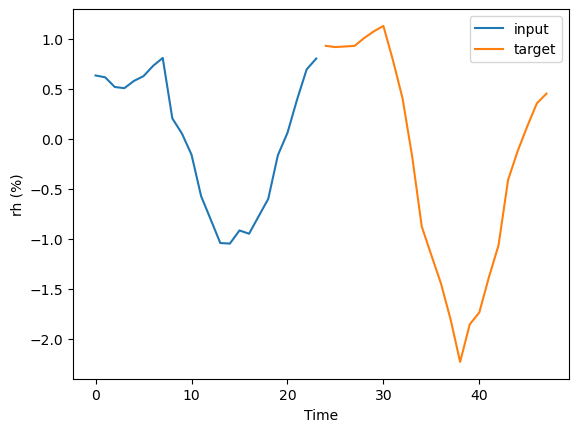

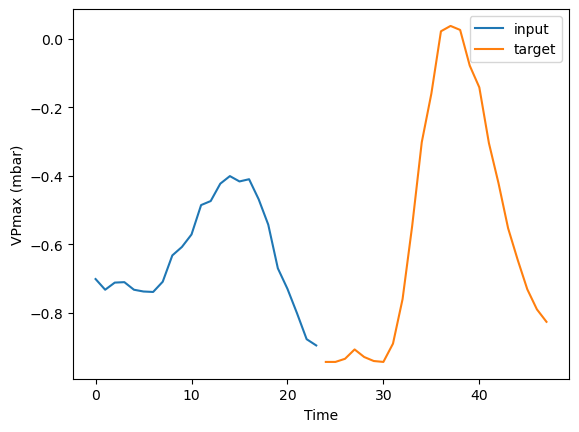

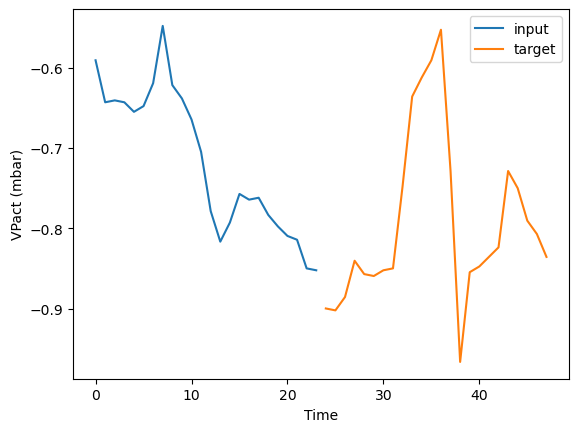

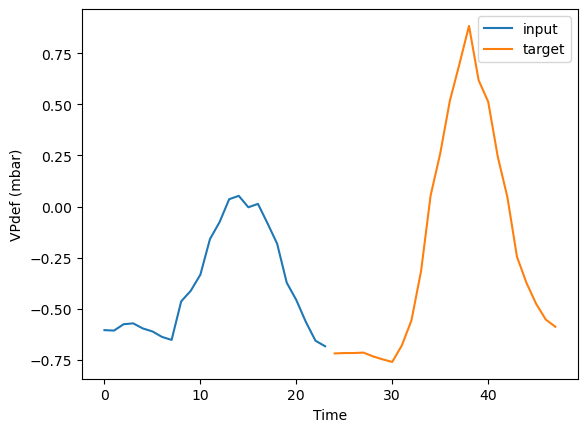

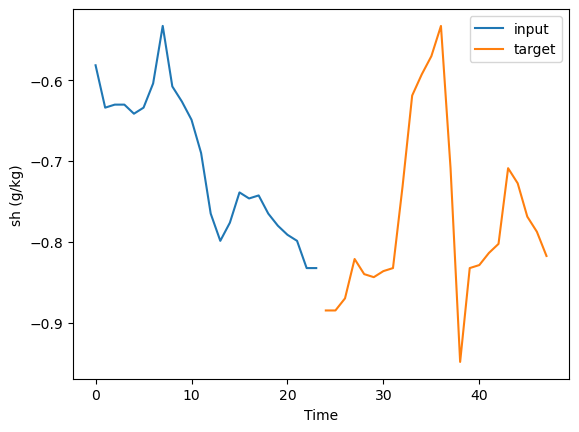

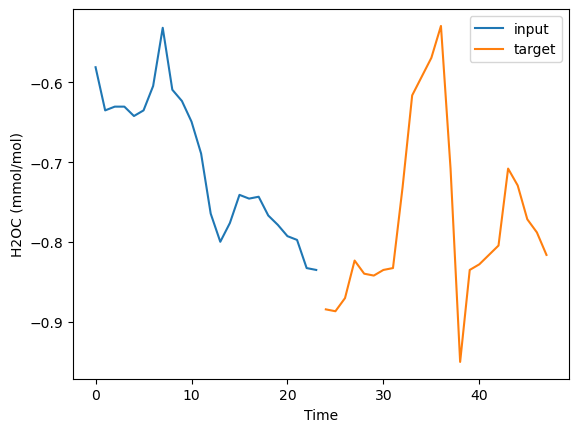

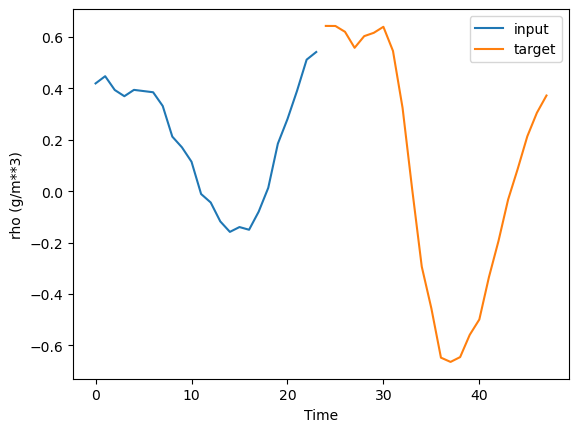

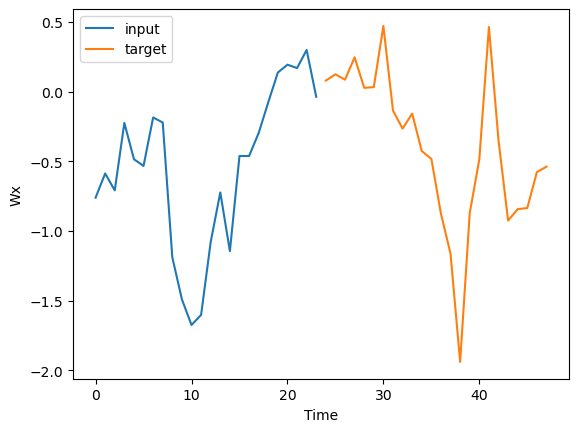

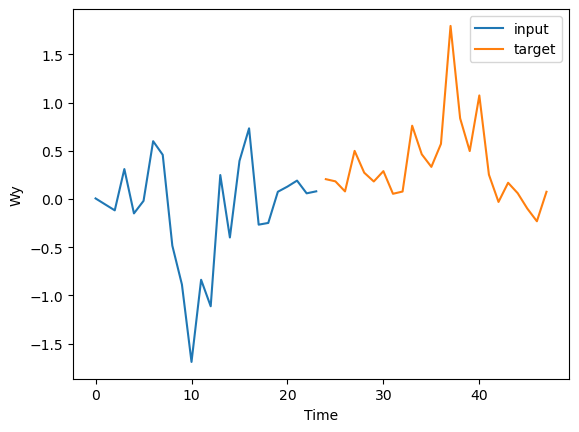

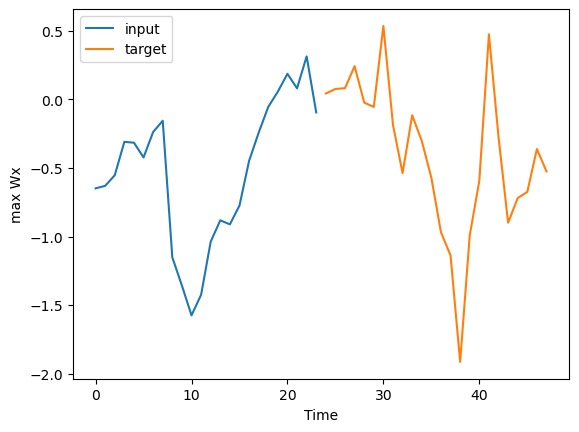

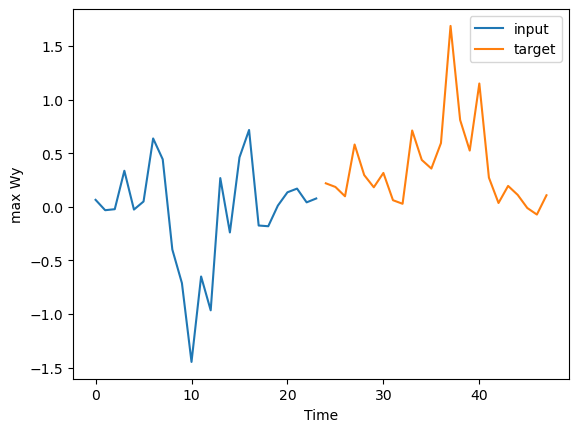

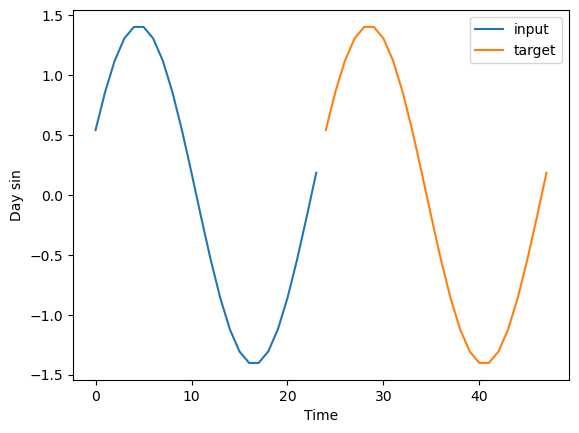

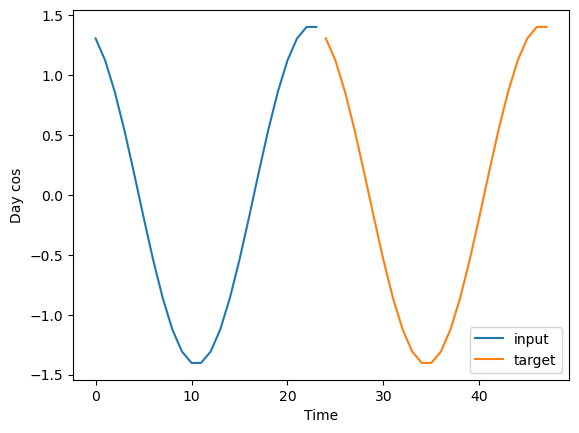

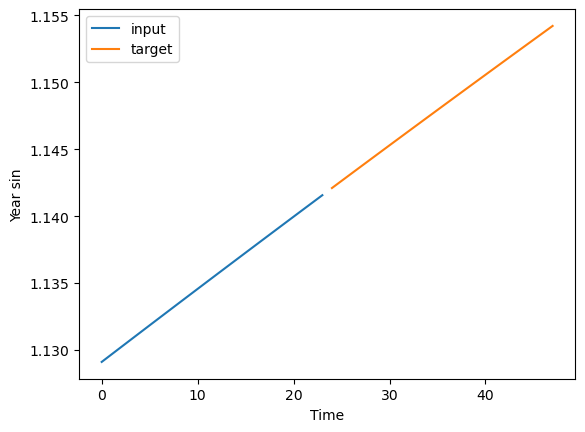

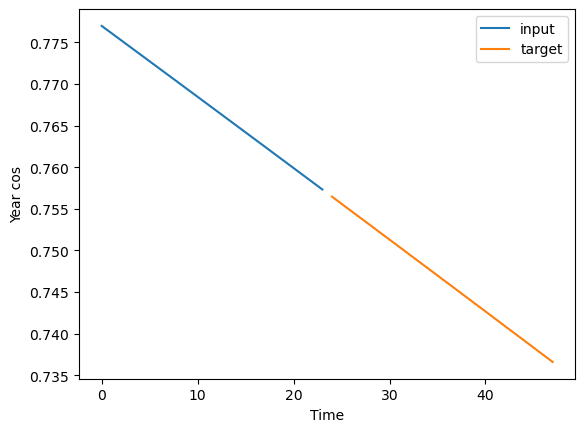

In [ ]:
# Let's visualize some examples
idx = random.randint(0, len(train_data))
inputs = train_data[idx]['inputs'].numpy()
targets = train_data[idx]['targets'].numpy()

for i in range(len(train_df.columns)):
    plt.plot(range(INPUT_WIDTH), inputs[:,i], label='input')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), targets[:,i], label='target')
    plt.ylabel(train_df.columns[i])
    plt.xlabel('Time')
    plt.legend()
    plt.show()


In this modified version of time series lstm we will use teacher forcing during training only. For Validation and evaluation we will set teacher forcing flag to False. The reason why we are using this approach are the following:

**Training with Teacher Forcing:**

Stability and Faster Convergence:
- Teacher forcing during training will provide a stable and well-defined target for each time step. It helps to guide the model early in training and can lead to faster convergence. During initial training steps, when the model's own predictions might be far from the correct targets, having access to the ground truth as inputs (teacher forcing) can help the model learn meaningful representations and relationships in the data.

Reducing Error Propagation:
- Teacher forcing can mitigate the issue of error propagation. When the model makes an incorrect prediction at one time step, using its own incorrect prediction as input for the next time step can lead to compounding errors. Teacher forcing provides a way to break this cycle by providing the correct target as input.

**Validation and Evaluation without Teacher Forcing:**

Model's Realistic Performance Assessment:
- During validation and evaluation, we want to assess how well the model can perform when it doesn't have access to the true targets. In real-world scenarios, we won't have access to the true targets during prediction, so it's important to evaluate the model in a more realistic setting.

Evaluating Autoregressive Behavior:
- When we disable teacher forcing during validation and evaluation, the model is forced to rely on its own previous predictions, which is often the behavior we want in real applications. This allows us to measure how well the model can autonomously generate predictions over time.

Generalization:
- By evaluating the model without teacher forcing, we can assess its generalization capability and its ability to handle unseen or future data points.

In summary, we are using teacher forcing during training to help the model learn and converge more effectively, while evaluating without teacher forcing allows to assess the model's performance in a more realistic and autonomous scenario, which is crucial for real-world applications.

In [ ]:
class WeatherPredictor(torch.nn.Module): # WeatherPredictorWithTeacherForcing
    def __init__(self, num_features, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = torch.nn.LSTMCell(num_features, hidden_size)
        self.linear = torch.nn.Linear(hidden_size, num_features)

    def forward(self, inputs, num_steps, teacher_forcing=True):
        inputs = inputs.transpose(0, 1)
        hx = torch.zeros((inputs.shape[1], self.hidden_size), device=inputs.device)
        cx = torch.zeros((inputs.shape[1], self.hidden_size), device=inputs.device)
        outputs = []

        for t in range(num_steps):
            if t == 0 or not teacher_forcing:
                input_t = inputs[t]
            else:
                input_t = outputs[-1]

            hx, cx = self.lstm(input_t, (hx, cx))
            output_t = self.linear(hx)
            outputs.append(output_t)

        outputs = torch.stack(outputs)
        outputs = outputs.transpose(0, 1)
        return outputs

In [ ]:
def evaluate(model, data_loader, **kwargs):
    loss_fn = kwargs.get('loss_fn', torch.nn.functional.mse_loss)
    device = kwargs.get('device', torch.device('cpu'))
    teacher_forcing = kwargs.get('teacher_forcing', False )  # Disable teacher forcing during evaluation

    model.eval()
    pbar = tqdm(enumerate(data_loader), total=len(data_loader))
    avg_loss = 0.
    for i, batch in pbar:
        batch['inputs'] = batch['inputs'].to(device)
        batch['targets'] = batch['targets'].to(device)
        num_steps = batch['targets'].shape[1]
        with torch.no_grad():
            preds = model(batch['inputs'], num_steps, teacher_forcing)  # Pass teacher_forcing flag
        loss = loss_fn(preds, batch['targets'])
        avg_loss += loss.item()
        pbar.set_description(f'loss = {loss:.3f}')
    avg_loss /= len(data_loader)
    return avg_loss

def fit(model, train_loader, val_loader, optimizer, **kwargs):
    num_epochs = kwargs.get('num_epochs', 100)
    loss_fn = kwargs.get('loss_fn', torch.nn.functional.mse_loss)
    device = kwargs.get('device', torch.device('cpu'))
    teacher_forcing = kwargs.get('teacher_forcing', True)  # Set teacher forcing as needed


    train_loss_hist, val_loss_hist = [], []
    min_val_loss = np.inf
    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')

        print('Training phase...')
        model.train()
        train_loss = 0.
        pbar = tqdm(enumerate(train_loader), total=len(train_loader))
        for i, batch in pbar:
            batch['inputs'] = batch['inputs'].to(device)
            batch['targets'] = batch['targets'].to(device)
            model.zero_grad()
            num_steps = batch['targets'].shape[1]
            preds = model(batch['inputs'], num_steps, teacher_forcing)  # Pass teacher_forcing flag
            loss = loss_fn(preds, batch['targets'])
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            pbar.set_description(f'loss = {loss:.3f}')
        train_loss /= len(train_loader)
        print(f'train loss = {train_loss:.3f}')
        train_loss_hist.append(train_loss)

        print('Validation phase...')
        val_loss = evaluate(model, val_loader, loss_fn=loss_fn, device=device, teacher_forcing=False)  #  Disable teacher forcing during validation
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            torch.save(model.state_dict(), 'model.pt')
        print(f'validation loss = {val_loss:.3f}')
        val_loss_hist.append(val_loss)

    return train_loss_hist, val_loss_hist


In [ ]:
HIDDEN_SIZE = 32
LEARNING_RATE = 1e-3
NUM_EPOCHS = 60
BATCH_SIZE = 16

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
# elif torch.backends.mps.is_available():
#     DEVICE = torch.device('mps')
else:
    DEVICE = torch.device('cpu')
print('DEVICE:', DEVICE)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

model = WeatherPredictor(train_data[0]['inputs'].shape[1], HIDDEN_SIZE).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

DEVICE: cpu


In [ ]:
train_loss, val_loss = fit(model, train_loader, val_loader, optimizer, num_epochs=NUM_EPOCHS, device=DEVICE)

Epoch 1/60
Training phase...


loss = 0.675: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.58it/s]


train loss = 0.837
Validation phase...


loss = 0.489: 100%|████████████████████████████| 37/37 [00:00<00:00, 274.93it/s]


validation loss = 0.625
Epoch 2/60
Training phase...


loss = 0.611: 100%|██████████████████████████| 128/128 [00:01<00:00, 102.50it/s]


train loss = 0.669
Validation phase...


loss = 0.488: 100%|████████████████████████████| 37/37 [00:00<00:00, 274.75it/s]


validation loss = 0.602
Epoch 3/60
Training phase...


loss = 0.753: 100%|██████████████████████████| 128/128 [00:01<00:00, 108.61it/s]


train loss = 0.622
Validation phase...


loss = 0.498: 100%|████████████████████████████| 37/37 [00:00<00:00, 271.01it/s]


validation loss = 0.586
Epoch 4/60
Training phase...


loss = 0.665: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.07it/s]


train loss = 0.585
Validation phase...


loss = 0.466: 100%|████████████████████████████| 37/37 [00:00<00:00, 249.38it/s]


validation loss = 0.558
Epoch 5/60
Training phase...


loss = 0.688: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.42it/s]


train loss = 0.537
Validation phase...


loss = 0.430: 100%|████████████████████████████| 37/37 [00:00<00:00, 269.23it/s]


validation loss = 0.536
Epoch 6/60
Training phase...


loss = 0.475: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.90it/s]


train loss = 0.505
Validation phase...


loss = 0.416: 100%|████████████████████████████| 37/37 [00:00<00:00, 275.44it/s]


validation loss = 0.515
Epoch 7/60
Training phase...


loss = 0.476: 100%|██████████████████████████| 128/128 [00:01<00:00, 106.28it/s]


train loss = 0.493
Validation phase...


loss = 0.398: 100%|████████████████████████████| 37/37 [00:00<00:00, 275.89it/s]


validation loss = 0.498
Epoch 8/60
Training phase...


loss = 0.384: 100%|██████████████████████████| 128/128 [00:01<00:00, 106.27it/s]


train loss = 0.481
Validation phase...


loss = 0.382: 100%|████████████████████████████| 37/37 [00:00<00:00, 256.16it/s]


validation loss = 0.488
Epoch 9/60
Training phase...


loss = 0.478: 100%|██████████████████████████| 128/128 [00:01<00:00, 106.91it/s]


train loss = 0.470
Validation phase...


loss = 0.369: 100%|████████████████████████████| 37/37 [00:00<00:00, 236.26it/s]


validation loss = 0.482
Epoch 10/60
Training phase...


loss = 0.458: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.71it/s]


train loss = 0.460
Validation phase...


loss = 0.352: 100%|████████████████████████████| 37/37 [00:00<00:00, 276.78it/s]


validation loss = 0.473
Epoch 11/60
Training phase...


loss = 0.412: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.01it/s]


train loss = 0.441
Validation phase...


loss = 0.339: 100%|████████████████████████████| 37/37 [00:00<00:00, 231.31it/s]


validation loss = 0.455
Epoch 12/60
Training phase...


loss = 0.406: 100%|██████████████████████████| 128/128 [00:01<00:00, 108.71it/s]


train loss = 0.427
Validation phase...


loss = 0.328: 100%|████████████████████████████| 37/37 [00:00<00:00, 287.31it/s]


validation loss = 0.440
Epoch 13/60
Training phase...


loss = 0.340: 100%|██████████████████████████| 128/128 [00:01<00:00, 104.34it/s]


train loss = 0.416
Validation phase...


loss = 0.320: 100%|████████████████████████████| 37/37 [00:00<00:00, 273.61it/s]


validation loss = 0.434
Epoch 14/60
Training phase...


loss = 0.392: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.21it/s]


train loss = 0.408
Validation phase...


loss = 0.318: 100%|████████████████████████████| 37/37 [00:00<00:00, 245.35it/s]


validation loss = 0.427
Epoch 15/60
Training phase...


loss = 0.401: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.63it/s]


train loss = 0.404
Validation phase...


loss = 0.312: 100%|████████████████████████████| 37/37 [00:00<00:00, 281.87it/s]


validation loss = 0.421
Epoch 16/60
Training phase...


loss = 0.501: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.15it/s]


train loss = 0.401
Validation phase...


loss = 0.315: 100%|████████████████████████████| 37/37 [00:00<00:00, 282.43it/s]


validation loss = 0.416
Epoch 17/60
Training phase...


loss = 0.409: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.44it/s]


train loss = 0.396
Validation phase...


loss = 0.307: 100%|████████████████████████████| 37/37 [00:00<00:00, 268.00it/s]


validation loss = 0.412
Epoch 18/60
Training phase...


loss = 0.301: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.04it/s]


train loss = 0.394
Validation phase...


loss = 0.317: 100%|████████████████████████████| 37/37 [00:00<00:00, 221.82it/s]


validation loss = 0.409
Epoch 19/60
Training phase...


loss = 0.429: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.48it/s]


train loss = 0.394
Validation phase...


loss = 0.302: 100%|████████████████████████████| 37/37 [00:00<00:00, 261.16it/s]


validation loss = 0.407
Epoch 20/60
Training phase...


loss = 0.402: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.93it/s]


train loss = 0.389
Validation phase...


loss = 0.298: 100%|████████████████████████████| 37/37 [00:00<00:00, 261.45it/s]


validation loss = 0.402
Epoch 21/60
Training phase...


loss = 0.530: 100%|██████████████████████████| 128/128 [00:01<00:00, 106.57it/s]


train loss = 0.390
Validation phase...


loss = 0.305: 100%|████████████████████████████| 37/37 [00:00<00:00, 252.74it/s]


validation loss = 0.399
Epoch 22/60
Training phase...


loss = 0.477: 100%|██████████████████████████| 128/128 [00:01<00:00, 108.82it/s]


train loss = 0.384
Validation phase...


loss = 0.306: 100%|████████████████████████████| 37/37 [00:00<00:00, 283.93it/s]


validation loss = 0.397
Epoch 23/60
Training phase...


loss = 0.461: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.07it/s]


train loss = 0.385
Validation phase...


loss = 0.294: 100%|████████████████████████████| 37/37 [00:00<00:00, 279.85it/s]


validation loss = 0.394
Epoch 24/60
Training phase...


loss = 0.394: 100%|██████████████████████████| 128/128 [00:01<00:00, 108.60it/s]


train loss = 0.383
Validation phase...


loss = 0.297: 100%|████████████████████████████| 37/37 [00:00<00:00, 267.53it/s]


validation loss = 0.394
Epoch 25/60
Training phase...


loss = 0.331: 100%|██████████████████████████| 128/128 [00:01<00:00, 107.30it/s]


train loss = 0.382
Validation phase...


loss = 0.295: 100%|████████████████████████████| 37/37 [00:00<00:00, 282.81it/s]


validation loss = 0.392
Epoch 26/60
Training phase...


loss = 0.421: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.07it/s]


train loss = 0.379
Validation phase...


loss = 0.299: 100%|████████████████████████████| 37/37 [00:00<00:00, 279.28it/s]


validation loss = 0.390
Epoch 27/60
Training phase...


loss = 0.461: 100%|██████████████████████████| 128/128 [00:01<00:00, 108.60it/s]


train loss = 0.380
Validation phase...


loss = 0.298: 100%|████████████████████████████| 37/37 [00:00<00:00, 277.93it/s]


validation loss = 0.386
Epoch 28/60
Training phase...


loss = 0.354: 100%|██████████████████████████| 128/128 [00:01<00:00, 107.08it/s]


train loss = 0.378
Validation phase...


loss = 0.291: 100%|████████████████████████████| 37/37 [00:00<00:00, 278.98it/s]


validation loss = 0.386
Epoch 29/60
Training phase...


loss = 0.328: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.65it/s]


train loss = 0.375
Validation phase...


loss = 0.297: 100%|████████████████████████████| 37/37 [00:00<00:00, 279.86it/s]


validation loss = 0.387
Epoch 30/60
Training phase...


loss = 0.423: 100%|██████████████████████████| 128/128 [00:01<00:00, 103.61it/s]


train loss = 0.375
Validation phase...


loss = 0.292: 100%|████████████████████████████| 37/37 [00:00<00:00, 254.38it/s]


validation loss = 0.383
Epoch 31/60
Training phase...


loss = 0.381: 100%|██████████████████████████| 128/128 [00:01<00:00, 105.65it/s]


train loss = 0.376
Validation phase...


loss = 0.293: 100%|████████████████████████████| 37/37 [00:00<00:00, 280.67it/s]


validation loss = 0.382
Epoch 32/60
Training phase...


loss = 0.315: 100%|██████████████████████████| 128/128 [00:01<00:00, 104.47it/s]


train loss = 0.373
Validation phase...


loss = 0.295: 100%|████████████████████████████| 37/37 [00:00<00:00, 262.27it/s]


validation loss = 0.380
Epoch 33/60
Training phase...


loss = 0.393: 100%|██████████████████████████| 128/128 [00:01<00:00, 104.11it/s]


train loss = 0.373
Validation phase...


loss = 0.288: 100%|████████████████████████████| 37/37 [00:00<00:00, 269.75it/s]


validation loss = 0.379
Epoch 34/60
Training phase...


loss = 0.369: 100%|██████████████████████████| 128/128 [00:01<00:00, 107.58it/s]


train loss = 0.372
Validation phase...


loss = 0.288: 100%|████████████████████████████| 37/37 [00:00<00:00, 284.67it/s]


validation loss = 0.379
Epoch 35/60
Training phase...


loss = 0.362: 100%|██████████████████████████| 128/128 [00:01<00:00, 102.78it/s]


train loss = 0.371
Validation phase...


loss = 0.280: 100%|████████████████████████████| 37/37 [00:00<00:00, 283.68it/s]


validation loss = 0.377
Epoch 36/60
Training phase...


loss = 0.402: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.72it/s]


train loss = 0.369
Validation phase...


loss = 0.292: 100%|████████████████████████████| 37/37 [00:00<00:00, 284.01it/s]


validation loss = 0.374
Epoch 37/60
Training phase...


loss = 0.541: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.90it/s]


train loss = 0.371
Validation phase...


loss = 0.286: 100%|████████████████████████████| 37/37 [00:00<00:00, 285.74it/s]


validation loss = 0.375
Epoch 38/60
Training phase...


loss = 0.388: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.72it/s]


train loss = 0.369
Validation phase...


loss = 0.284: 100%|████████████████████████████| 37/37 [00:00<00:00, 283.33it/s]


validation loss = 0.375
Epoch 39/60
Training phase...


loss = 0.317: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.36it/s]


train loss = 0.368
Validation phase...


loss = 0.279: 100%|████████████████████████████| 37/37 [00:00<00:00, 281.28it/s]


validation loss = 0.374
Epoch 40/60
Training phase...


loss = 0.330: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.20it/s]


train loss = 0.368
Validation phase...


loss = 0.289: 100%|████████████████████████████| 37/37 [00:00<00:00, 276.75it/s]


validation loss = 0.374
Epoch 41/60
Training phase...


loss = 0.360: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.48it/s]


train loss = 0.366
Validation phase...


loss = 0.285: 100%|████████████████████████████| 37/37 [00:00<00:00, 285.10it/s]


validation loss = 0.373
Epoch 42/60
Training phase...


loss = 0.417: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.77it/s]


train loss = 0.367
Validation phase...


loss = 0.282: 100%|████████████████████████████| 37/37 [00:00<00:00, 283.29it/s]


validation loss = 0.372
Epoch 43/60
Training phase...


loss = 0.309: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.69it/s]


train loss = 0.365
Validation phase...


loss = 0.282: 100%|████████████████████████████| 37/37 [00:00<00:00, 288.25it/s]


validation loss = 0.372
Epoch 44/60
Training phase...


loss = 0.414: 100%|██████████████████████████| 128/128 [00:01<00:00, 112.26it/s]


train loss = 0.365
Validation phase...


loss = 0.279: 100%|████████████████████████████| 37/37 [00:00<00:00, 284.46it/s]


validation loss = 0.371
Epoch 45/60
Training phase...


loss = 0.334: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.33it/s]


train loss = 0.363
Validation phase...


loss = 0.286: 100%|████████████████████████████| 37/37 [00:00<00:00, 285.21it/s]


validation loss = 0.369
Epoch 46/60
Training phase...


loss = 0.316: 100%|██████████████████████████| 128/128 [00:01<00:00, 111.23it/s]


train loss = 0.363
Validation phase...


loss = 0.280: 100%|████████████████████████████| 37/37 [00:00<00:00, 280.61it/s]


validation loss = 0.368
Epoch 47/60
Training phase...


loss = 0.351: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.88it/s]


train loss = 0.362
Validation phase...


loss = 0.282: 100%|████████████████████████████| 37/37 [00:00<00:00, 261.24it/s]


validation loss = 0.367
Epoch 48/60
Training phase...


loss = 0.329: 100%|██████████████████████████| 128/128 [00:01<00:00, 105.10it/s]


train loss = 0.362
Validation phase...


loss = 0.281: 100%|████████████████████████████| 37/37 [00:00<00:00, 279.72it/s]


validation loss = 0.367
Epoch 49/60
Training phase...


loss = 0.346: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.21it/s]


train loss = 0.364
Validation phase...


loss = 0.277: 100%|████████████████████████████| 37/37 [00:00<00:00, 253.46it/s]


validation loss = 0.369
Epoch 50/60
Training phase...


loss = 0.306: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.28it/s]


train loss = 0.360
Validation phase...


loss = 0.283: 100%|████████████████████████████| 37/37 [00:00<00:00, 278.71it/s]


validation loss = 0.366
Epoch 51/60
Training phase...


loss = 0.342: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.71it/s]


train loss = 0.363
Validation phase...


loss = 0.276: 100%|████████████████████████████| 37/37 [00:00<00:00, 279.32it/s]


validation loss = 0.367
Epoch 52/60
Training phase...


loss = 0.473: 100%|██████████████████████████| 128/128 [00:01<00:00, 108.16it/s]


train loss = 0.361
Validation phase...


loss = 0.279: 100%|████████████████████████████| 37/37 [00:00<00:00, 259.53it/s]


validation loss = 0.366
Epoch 53/60
Training phase...


loss = 0.417: 100%|██████████████████████████| 128/128 [00:01<00:00, 105.19it/s]


train loss = 0.358
Validation phase...


loss = 0.285: 100%|████████████████████████████| 37/37 [00:00<00:00, 279.71it/s]


validation loss = 0.365
Epoch 54/60
Training phase...


loss = 0.445: 100%|██████████████████████████| 128/128 [00:01<00:00, 109.01it/s]


train loss = 0.359
Validation phase...


loss = 0.282: 100%|████████████████████████████| 37/37 [00:00<00:00, 274.75it/s]


validation loss = 0.366
Epoch 55/60
Training phase...


loss = 0.432: 100%|██████████████████████████| 128/128 [00:01<00:00, 106.24it/s]


train loss = 0.360
Validation phase...


loss = 0.278: 100%|████████████████████████████| 37/37 [00:00<00:00, 279.12it/s]


validation loss = 0.365
Epoch 56/60
Training phase...


loss = 0.373: 100%|██████████████████████████| 128/128 [00:01<00:00, 107.42it/s]


train loss = 0.358
Validation phase...


loss = 0.277: 100%|████████████████████████████| 37/37 [00:00<00:00, 265.42it/s]


validation loss = 0.366
Epoch 57/60
Training phase...


loss = 0.312: 100%|██████████████████████████| 128/128 [00:01<00:00, 107.46it/s]


train loss = 0.359
Validation phase...


loss = 0.276: 100%|████████████████████████████| 37/37 [00:00<00:00, 283.81it/s]


validation loss = 0.366
Epoch 58/60
Training phase...


loss = 0.309: 100%|██████████████████████████| 128/128 [00:01<00:00, 107.94it/s]


train loss = 0.358
Validation phase...


loss = 0.290: 100%|████████████████████████████| 37/37 [00:00<00:00, 254.10it/s]


validation loss = 0.365
Epoch 59/60
Training phase...


loss = 0.215: 100%|██████████████████████████| 128/128 [00:01<00:00, 110.40it/s]


train loss = 0.356
Validation phase...


loss = 0.276: 100%|████████████████████████████| 37/37 [00:00<00:00, 284.79it/s]


validation loss = 0.367
Epoch 60/60
Training phase...


loss = 0.379: 100%|██████████████████████████| 128/128 [00:01<00:00, 112.03it/s]


train loss = 0.357
Validation phase...


loss = 0.284: 100%|████████████████████████████| 37/37 [00:00<00:00, 287.81it/s]

validation loss = 0.363


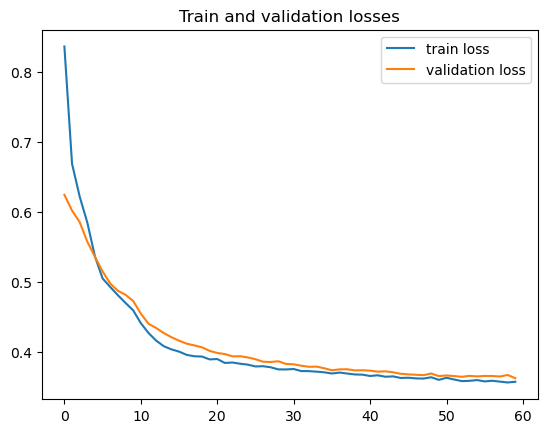

In [ ]:
plt.title('Train and validation losses')
plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(val_loss)), val_loss, label='validation loss')
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [ ]:
test_loss = evaluate(model, test_loader, device=DEVICE)
print(f'Test loss = {test_loss:.3f}')

loss = 0.150: 100%|████████████████████████████| 19/19 [00:00<00:00, 263.66it/s]

Test loss = 0.324


In [ ]:
def predict(model, data_loader, **kwargs):
    num_steps = kwargs.get('num_steps', 24)
    device = kwargs.get('device', torch.device('cpu'))
    teacher_forcing = kwargs.get('teacher_forcing', False )  # Set teacher_forcing as needed

    model.eval()
    preds = []
    pbar = tqdm(enumerate(data_loader), total=len(data_loader))
    for i, batch in pbar:
        batch['inputs'] = batch['inputs'].to(device)
        with torch.no_grad():
            preds_i = model(batch['inputs'], num_steps, teacher_forcing).cpu()  # Pass teacher_forcing flag
        preds.extend([pred for pred in preds_i])
    return preds


In [ ]:
test_preds = predict(model, test_loader, num_steps=TARGET_WIDTH, device=DEVICE)

100%|██████████████████████████████████████████| 19/19 [00:00<00:00, 436.18it/s]


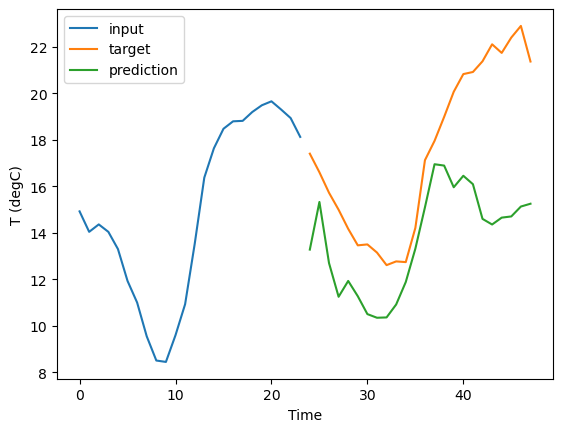

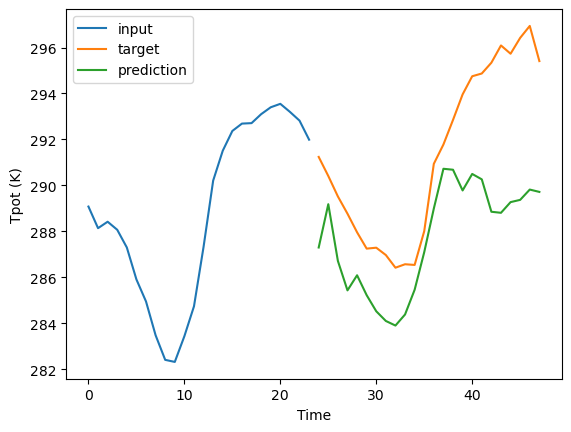

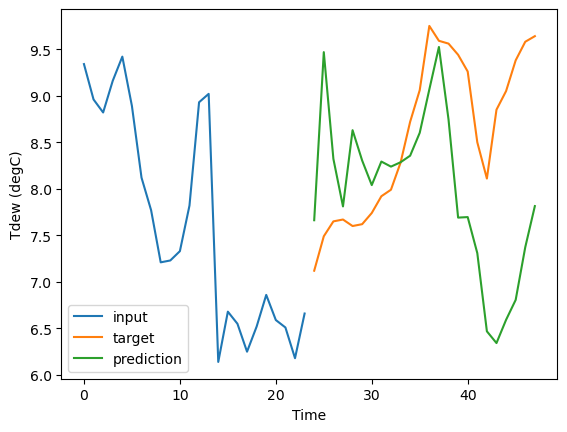

In [ ]:
idx = random.randint(0, len(test_data))
inputs = test_data[idx]['inputs'].numpy()
targets = test_data[idx]['targets'].numpy()
preds = test_preds[idx].numpy()

# denormalize the inputs, targets and predictions
inputs = inputs * train_std.values + train_mean.values
targets = targets * train_std.values + train_mean.values
preds = preds * train_std.values + train_mean.values

for i in [1, 2, 3]:
    plt.plot(range(INPUT_WIDTH), inputs[:,i], label='input')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), targets[:,i], label='target')
    plt.plot(range(INPUT_WIDTH, INPUT_WIDTH + TARGET_WIDTH), preds[:,i], label='prediction')
    plt.ylabel(test_df.columns[i])
    plt.xlabel('Time')
    plt.legend()
    plt.show()

***Comparing results from this model with the model implemented in time series lstm SOLVED.ipynb that does not use teacher forcing***

By analyzing the graphic with train and validation losses from both models, the model without teacher forcing has better results. Not only for this step but also when comparing the graphics for input, target and predictions.

Test Loss without Teacher Forcing (0.251):

- This result represents the model's performance when it is not using teacher forcing. In this mode, the model relies on its own predictions from previous time steps to make future predictions.
- A lower test loss suggests that the model can generate accurate predictions without relying on ground truth targets. This is a positive sign, indicating that the model has learned to make meaningful predictions autonomously.
- Lower test loss generally suggests better generalization, as it indicates the model's ability to perform well in real-world scenarios where true targets may not be available.

Test Loss with Teacher Forcing (0.324):

- This result represents the model's performance when it continues to use teacher forcing. In this mode, the model receives the true target as input at each time step during training.
- A slightly higher test loss indicates that the model relies on ground truth targets. While this can be advantageous for training, it may not generalize well to real-world scenarios where true targets are not available.


**iii. Which of the strategies do you expect to yield a model with better generalization? Explain
your answer.**

We used scheduled sampling that is a strategy that gradually transits from using teacher forcing to using the model's own predictions. This transition occurs during training epochs, where we start with high teacher forcing and reduce it over time.

Advantages:
- It encourages the model to learn to make predictions without relying heavily on teacher forcing.
- It can lead to better generalization as the model becomes more self-reliant over time.

Potential Drawbacks:
- It may slow down convergence during early training, as the model initially faces the challenge of making predictions with limited guidance.


Besides that, when comparing the test loss from both models, the model without teacher forcing had lower test loss than the one with teacher forcing.

Based on the test results and the principles of generalization, the model that achieved a lower test loss without teacher forcing (0.251) is expected to generalize better. This is because it has demonstrated the ability to make accurate predictions without relying heavily on teacher forcing or ground truth targets.

The model with a higher test loss when using teacher forcing (0.324) suggests that it still relies on the provided targets for making predictions during testing. While teacher forcing is useful for training, it may hinder the model's ability to perform well in real-world scenarios where it needs to make predictions independently.

In summary, the strategy of allowing the model to make predictions autonomously, without teacher forcing, is expected to yield a model with better generalization. It indicates that the model has learned to capture meaningful patterns in the data and make accurate predictions in a more self-reliant manner, which is beneficial for real-world applications.